In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM4_video_07-17-24_D1_P2DLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M4_D1_P2_07-17-24_videoTime0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M4_D1_P2_07-17-24_stimulusTime0.csv'

north_pixel = 124
south_pixel = 445
east_pixel = 487
west_pixel = 146
shelter_x_pixel = 317
shelter_y_pixel = 421

#estimate for when mouse reaches shelter
escape_done = 10 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
10359,10359,10359,27.318695,11.767195,0.280212,28.235788,10.428325,0.988399,27.596995,10.024224,...,28.082374,8.047449,0.998757,27.261912,6.345114,0.999838,26.090678,4.557506,0.999940,136.998003
10360,10360,10360,27.206749,12.508490,0.105822,27.975943,11.054729,0.975877,27.377472,10.818246,...,27.715088,8.742616,0.999700,27.282996,7.180966,0.999658,26.098113,4.956932,0.999927,137.037632
10361,10361,10361,27.094802,13.249784,0.918265,27.824615,12.497436,0.998963,27.163489,12.403546,...,27.702630,9.330600,0.999881,27.282996,7.672595,0.999954,26.310600,5.777804,0.999814,137.077376
10362,10362,10362,27.094802,13.249784,0.759393,27.745785,12.497436,0.990281,27.056577,12.403546,...,27.630307,9.330600,0.999500,27.188241,7.672595,0.999879,26.310600,5.777804,0.999813,137.117389
10363,10363,10363,27.094802,13.249784,0.657858,27.561058,12.497436,0.995027,26.931759,12.403546,...,27.617162,9.330600,0.999919,27.182978,7.672595,0.999965,26.310600,5.777804,0.999898,137.157773


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
long_range

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6760,6760,6760,28.148425,11.282027,0.962879,26.618720,12.651077,0.999875,27.235239,13.113182,...,0.998799,22.170480,17.743121,0.999789,-6.998656,27.003394,19.512522,0.775506,2.875917,1.743484
6761,6761,6761,28.337252,10.553659,0.991440,27.109640,11.933009,0.999955,27.766426,12.445538,...,0.999911,22.684497,16.861866,0.999936,-6.958682,27.873121,23.626512,0.944446,2.776284,-2.492440
6762,6762,6762,28.401697,9.892122,0.997195,27.614115,11.177819,0.999908,28.163798,11.813897,...,0.999860,22.895854,15.975161,0.999837,-6.918720,28.334614,14.991835,0.599104,2.612671,-4.094211
6763,6763,6763,28.715478,9.101801,0.996631,27.876204,10.571109,0.999941,28.373025,11.137642,...,0.999967,23.133469,15.057858,0.999797,-6.876902,28.990151,18.806735,0.786460,2.594973,-0.423213
6764,6764,6764,29.362683,8.305158,0.995823,28.241411,9.646789,0.999520,28.870529,10.133535,...,0.998998,23.527910,14.023375,0.999525,-6.838694,29.892656,30.694886,1.172790,2.791596,5.146111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,7280,7280,4.232134,24.929561,0.990945,3.616915,23.872919,0.999944,2.934842,24.083097,...,0.999997,0.223034,20.317536,0.999988,13.806861,4.544757,0.197184,0.007968,1.568154,-0.346210
7281,7281,7281,4.197076,24.929851,0.991387,3.592818,23.872919,0.999935,2.911357,24.083097,...,0.999997,0.235279,20.312137,0.999987,13.846451,4.549358,0.173153,0.006855,1.557259,-0.275208
7282,7282,7282,4.197076,24.929851,0.990098,3.592818,23.872919,0.999933,2.911357,24.083097,...,0.999997,0.236840,20.312137,0.999987,13.886515,4.549358,0.000000,0.000000,1.557259,0.000000
7283,7283,7283,4.197076,24.929561,0.990655,3.592818,23.872919,0.999928,2.911357,24.083097,...,0.999997,0.236840,20.312137,0.999987,13.927040,4.549358,0.000000,0.000000,1.557377,0.002918


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

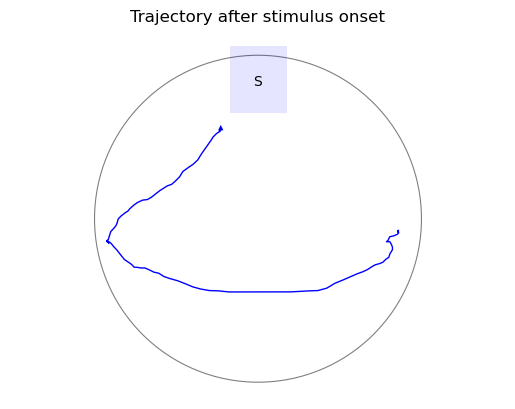

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

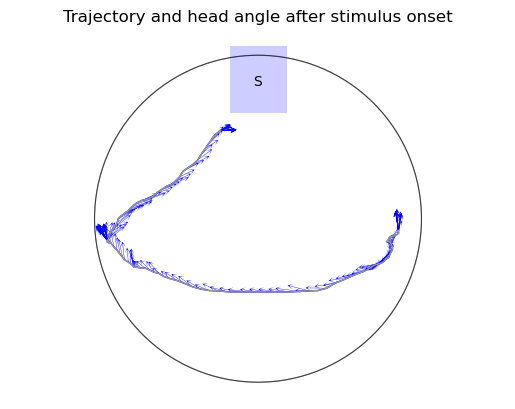

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6935,6935,6935,26.624949,2.193408,0.999850,26.839286,0.386905,0.999949,26.107989,0.145794,...,0.999947,24.113300,-4.661505,0.999992,0.006438,38.455588,4.843808,0.210183,0.690194,0.392379
6936,6936,6936,26.699215,2.369236,0.999943,26.845062,0.386905,0.999947,26.132610,0.220193,...,0.999975,24.277059,-4.589744,0.999995,0.043213,38.350711,4.116812,0.151396,0.734957,1.217197
6937,6937,6937,26.699215,2.369236,0.999930,26.845062,0.386963,0.999951,26.132610,0.222490,...,0.999981,24.349305,-4.589744,0.999995,0.083149,38.350711,0.000000,0.000000,0.734956,-0.000025
6938,6938,6938,26.699215,2.369236,0.999902,26.827980,0.417108,0.999963,26.107989,0.244353,...,0.999974,24.356451,-4.589744,0.999995,0.123213,38.344672,0.221560,0.008877,0.742803,0.195882
6939,6939,6939,26.590960,2.229607,0.999805,26.814234,0.386963,0.999935,26.107989,0.222490,...,0.999952,24.364536,-4.783527,0.999996,0.171174,38.389037,1.830284,0.087782,0.687240,-1.158506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,7170,7170,-3.135838,17.906887,0.999557,-4.601059,17.868142,0.999989,-4.986595,18.594990,...,0.999995,-9.444166,15.093976,0.999996,9.405760,11.773467,0.000000,0.000000,1.017918,-0.022843
7171,7171,7171,-3.135838,17.908882,0.999508,-4.579768,17.868142,0.999989,-4.974006,18.594990,...,0.999995,-9.444166,15.093976,0.999995,9.445683,11.777588,0.172842,0.006900,1.018122,0.005109
7172,7172,7172,-3.135838,17.909212,0.999507,-4.579768,17.868142,0.999988,-4.974006,18.601816,...,0.999995,-9.446573,15.107169,0.999996,9.485440,11.778765,0.193092,0.007677,1.017893,-0.005754
7173,7173,7173,-3.146221,17.909212,0.999493,-4.579915,17.866483,0.999987,-4.974006,18.592502,...,0.999994,-9.446573,15.107169,0.999995,9.525453,11.778765,0.000000,0.000000,1.016610,-0.032075


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

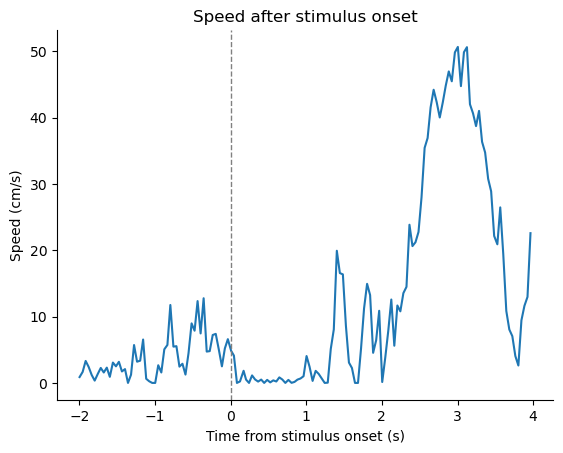

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

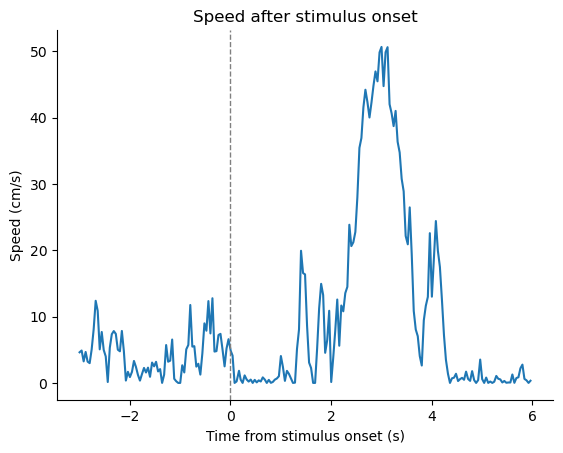

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

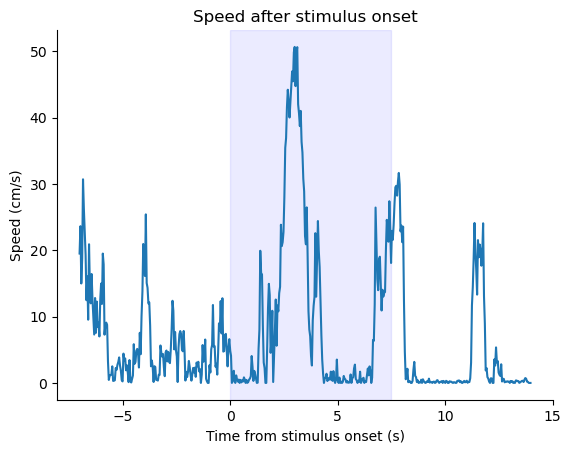

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

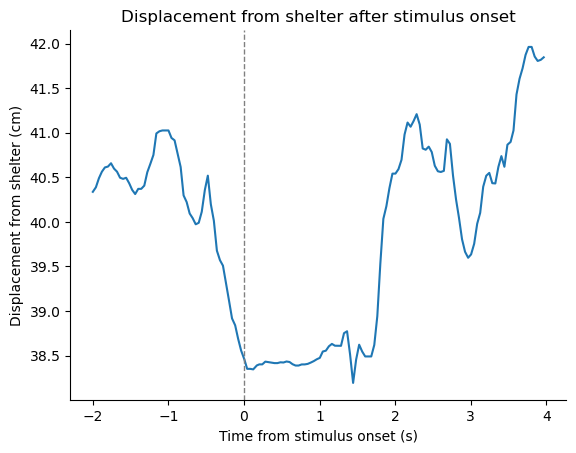

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

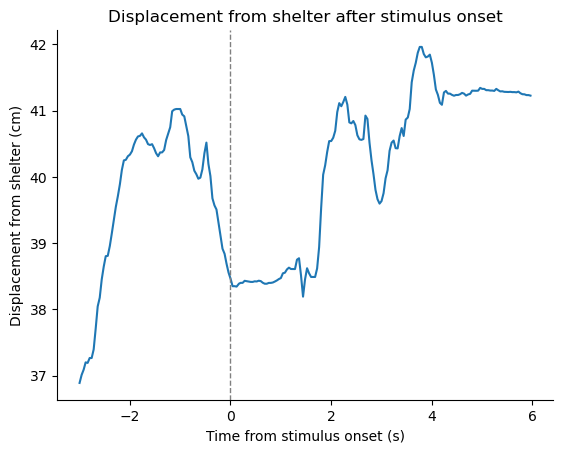

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

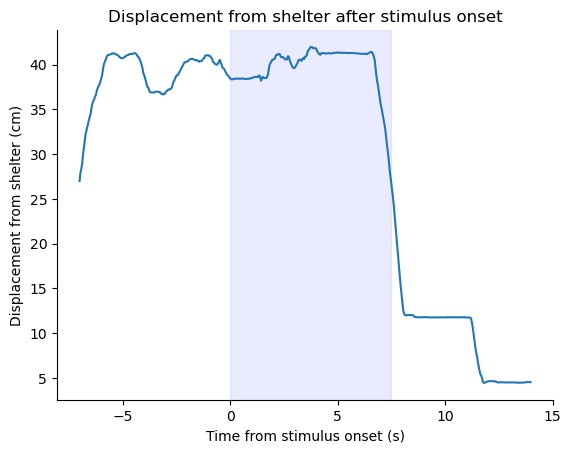

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

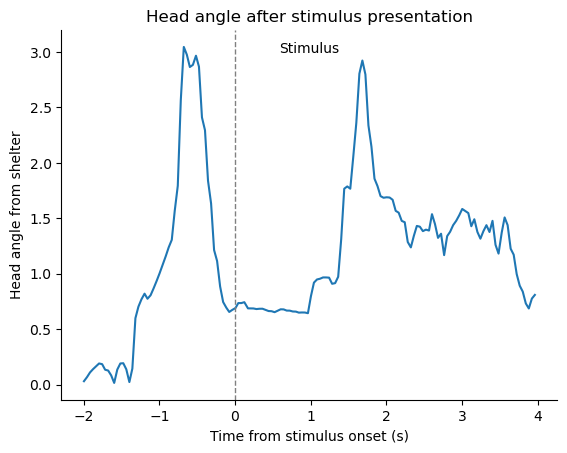

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

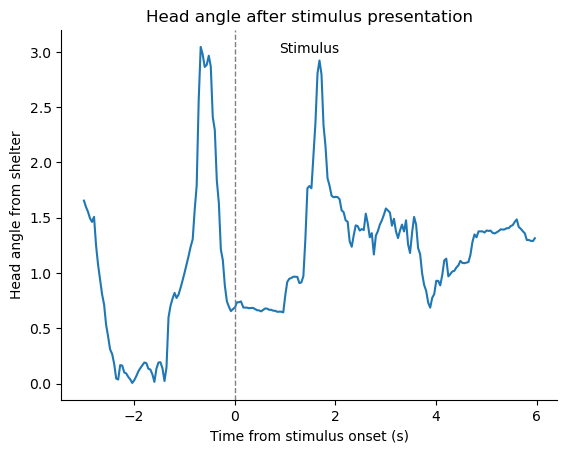

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

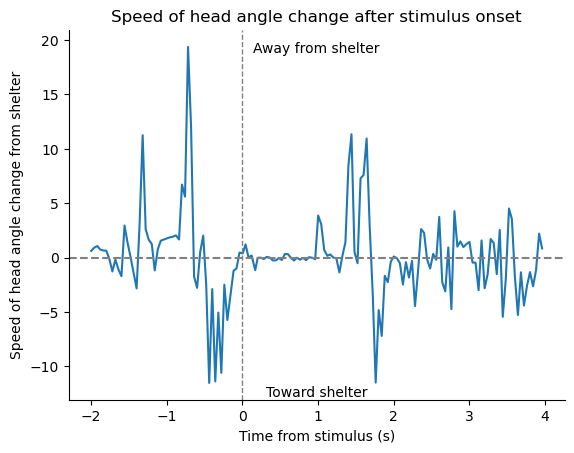

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6935,6935,6935,26.624949,2.193408,0.999850,26.839286,0.386905,0.999949,26.107989,0.145794,...,0.999947,24.113300,-4.661505,0.999992,0.006438,38.455588,4.843808,0.210183,0.690194,0.392379
6936,6936,6936,26.699215,2.369236,0.999943,26.845062,0.386905,0.999947,26.132610,0.220193,...,0.999975,24.277059,-4.589744,0.999995,0.043213,38.350711,4.116812,0.151396,0.734957,1.217197
6937,6937,6937,26.699215,2.369236,0.999930,26.845062,0.386963,0.999951,26.132610,0.222490,...,0.999981,24.349305,-4.589744,0.999995,0.083149,38.350711,0.000000,0.000000,0.734956,-0.000025
6938,6938,6938,26.699215,2.369236,0.999902,26.827980,0.417108,0.999963,26.107989,0.244353,...,0.999974,24.356451,-4.589744,0.999995,0.123213,38.344672,0.221560,0.008877,0.742803,0.195882
6939,6939,6939,26.590960,2.229607,0.999805,26.814234,0.386963,0.999935,26.107989,0.222490,...,0.999952,24.364536,-4.783527,0.999996,0.171174,38.389037,1.830284,0.087782,0.687240,-1.158506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,7170,7170,-3.135838,17.906887,0.999557,-4.601059,17.868142,0.999989,-4.986595,18.594990,...,0.999995,-9.444166,15.093976,0.999996,9.405760,11.773467,0.000000,0.000000,1.017918,-0.022843
7171,7171,7171,-3.135838,17.908882,0.999508,-4.579768,17.868142,0.999989,-4.974006,18.594990,...,0.999995,-9.444166,15.093976,0.999995,9.445683,11.777588,0.172842,0.006900,1.018122,0.005109
7172,7172,7172,-3.135838,17.909212,0.999507,-4.579768,17.868142,0.999988,-4.974006,18.601816,...,0.999995,-9.446573,15.107169,0.999996,9.485440,11.778765,0.193092,0.007677,1.017893,-0.005754
7173,7173,7173,-3.146221,17.909212,0.999493,-4.579915,17.866483,0.999987,-4.974006,18.592502,...,0.999994,-9.446573,15.107169,0.999995,9.525453,11.778765,0.000000,0.000000,1.016610,-0.032075


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6978,6978,6978,26.583569,-6.061273,0.841116,26.316654,-5.337017,0.999895,26.709025,-4.714295,...,0.999988,21.386894,-4.190666,0.999985,1.723814,38.619158,5.187452,0.207830,2.796866,-3.142174
6979,6979,6979,25.963509,-7.036742,0.520765,26.103993,-5.851852,0.999858,26.709025,-5.507992,...,0.999964,21.553289,-3.838498,0.999962,1.763763,38.941664,11.230031,0.448628,2.337783,-11.491726
6980,6980,6980,25.343450,-8.012210,0.805788,25.789676,-6.708692,0.999822,26.709025,-6.681363,...,0.999813,21.847958,-3.579287,0.999979,1.803789,39.531219,14.937796,0.597900,2.144889,-4.819212
6981,6981,6981,24.798599,-8.620413,0.890855,25.781466,-7.260819,0.999938,26.606486,-7.294179,...,0.999830,22.499405,-3.170530,0.999861,1.843750,40.034006,13.243102,0.529208,1.857061,-7.202736


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

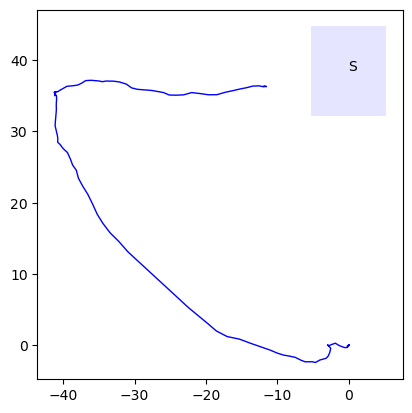

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


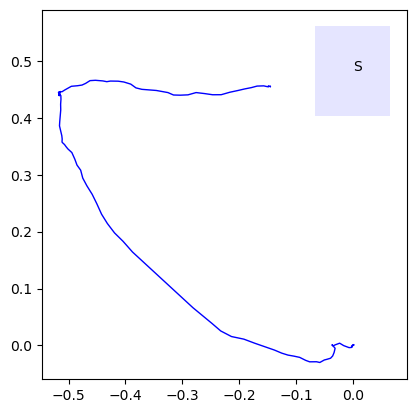

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

